In [1]:
#############################################################################################################
##### Notebook Analise de Sobrevivencia
##### Baseado em:
## 
##
## Dataset: http://www-eio.upc.edu/~pau/cms/rdata/csv/survival/lung.csv
##
##############################################################################################################
## Objetivos:
##   Mostrar as vantagens do metodo Survival Analysis: 
##    - Motivacao para a implementacao de explainability
##    - Teoria de suporte para um novo conjuntos de arquiteturas de aprendizagem profunda
##    - Possivel estrategia de analise
###################################################################################################################

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

path_in = 'C:/Users/dealbuqc/Desktop/ontomqol/Datasets/lung/'

In [4]:
# Leitura dos dados
data = pd.read_csv(path_in+"lung.csv")
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [6]:
# Estatistica basica sobre os dados

data.describe()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.00000,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,114.50000,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,65.96211,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.00000,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,57.75000,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,114.50000,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,171.25000,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,228.00000,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


<Axes: >

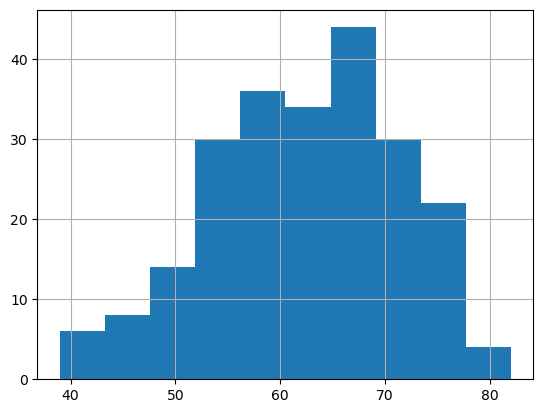

In [7]:
# Histograma
data["age"].hist()

In [8]:
# Criacao do modelo a ser utilizado e organizacao dos dados

kmf = KaplanMeierFitter()

# If status = 1 , then dead = 0
# If status = 2 , then dead = 1
data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [9]:
# Treinamento do modelo
# Primeiro argumento: variavel temporal (tempo de sobrevivencia)
# Segundo argumento: indica se o evento de interesse ocorreu

kmf.fit(durations =  data["time"], event_observed = data["dead"])

# Resultado eh dado em forma de tabela
# Removed = Observed + Censored
# Censored = pessoas que nao morreram mas nao trazem informacao relevante para o experimento
# Observed = pessoas que morrera durante o experimento

kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3


In [10]:
# Calculo manual das probabilidades de sobrevivencia

# t=0
event_at_0 = kmf.event_table.iloc[0,:]
surv_for_0 = (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk

# t=5
event_at_5 = kmf.event_table.iloc[1,:]
surv_for_5 = (event_at_5.at_risk - event_at_5.observed)/event_at_5.at_risk

# t=11
event_at_11 = kmf.event_table.iloc[2,:]
surv_for_11 = (event_at_11.at_risk - event_at_11.observed)/event_at_11.at_risk

# Calculo real das probabilidades em cada t:
surv_after_5 = surv_for_0 * surv_for_5
surv_after_11 = surv_for_0 * surv_for_5 * surv_for_11
print (surv_after_5)
print (surv_after_11)

0.9956140350877193
0.9824561403508771


In [11]:
# API ja faz este calculo automaticamente

# momento isolado
print (kmf.predict(11))

0.9824561403508766


In [12]:
# lista os momentos
print (kmf.predict([0,5,11,12]))

0     1.000000
5     0.995614
11    0.982456
12    0.978070
Name: KM_estimate, dtype: float64


In [13]:
# todos os momentos
print (kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
5.0          0.995614
11.0         0.982456
12.0         0.978070
13.0         0.969298
...               ...
840.0        0.067127
883.0        0.050346
965.0        0.050346
1010.0       0.050346
1022.0       0.050346

[187 rows x 1 columns]


In [14]:
# Tambem o numero de dias onde em media 50% dos pacientes morreram.
print (kmf.median_survival_time_)

310.0


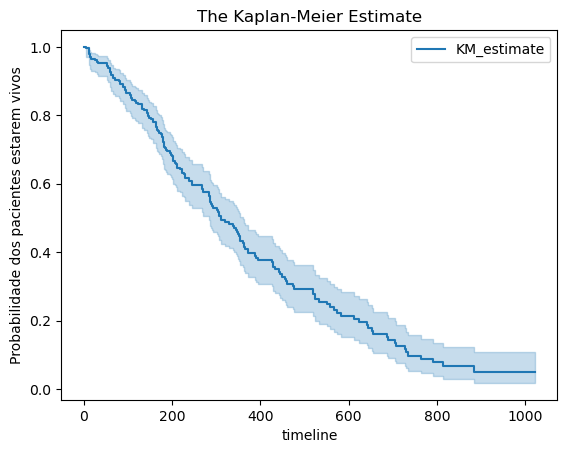

In [15]:
# Visualizacao por meio de grafico
kmf.plot()
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Probabilidade dos pacientes estarem vivos")
plt.show()

In [16]:
print (kmf.confidence_interval_)

# Probabilidade de morte :
# p(1022) = p(0) +......+p(1022)
print (kmf.cumulative_density_)


        KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.0                   1.000000                1.000000
5.0                   0.969277                0.999381
11.0                  0.953935                0.993379
12.0                  0.948120                0.990813
13.0                  0.936682                0.985244
...                        ...                     ...
840.0                 0.030728                0.123060
883.0                 0.017866                0.108662
965.0                 0.017866                0.108662
1010.0                0.017866                0.108662
1022.0                0.017866                0.108662

[187 rows x 2 columns]
          KM_estimate
timeline             
0.0          0.000000
5.0          0.004386
11.0         0.017544
12.0         0.021930
13.0         0.030702
...               ...
840.0        0.932873
883.0        0.949654
965.0        0.949654
1010.0       0.949654
1022.0       0.949654

[187 rows x 1 columns]


<Axes: xlabel='timeline'>

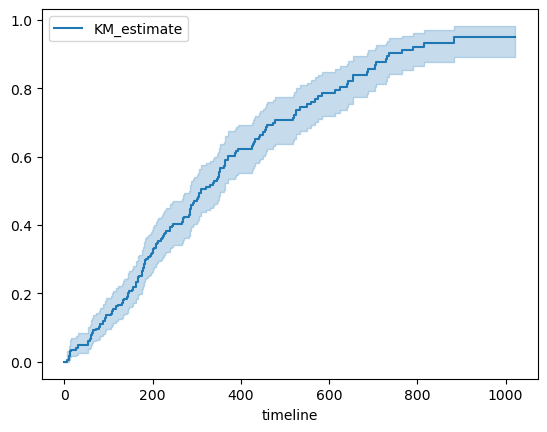

In [17]:
# Visualizacao dos dados acima: 
kmf.plot_cumulative_density() # Probabilidade de morte

In [ ]:
###############################################################################################
### Log Rank Test
###############################################################################################

In [18]:
# Aplicacao do tecnica para diferentes grupos

kmf_m = KaplanMeierFitter() 
kmf_f = KaplanMeierFitter() 

Male = data.query("sex == 1")
Female = data.query("sex == 2")

# Primeiro argumento: serie de tempos de sobrevivencia individuais
# Segundo argumento: serie indicando se o evento de interesse ocorreu

kmf_m.fit(durations =  Male["time"],event_observed = Male["dead"] ,label="Male")
kmf_f.fit(durations =  Female["time"],event_observed = Female["dead"], label="Female")

<lifelines.KaplanMeierFitter:"Female", fitted with 90 total observations, 37 right-censored observations>

In [19]:
kmf_m.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,138,138
11.0,3,3,0,0,138
12.0,1,1,0,0,135
13.0,2,2,0,0,134
15.0,1,1,0,0,132
...,...,...,...,...,...
814.0,1,1,0,0,5
840.0,1,0,1,0,4
883.0,1,1,0,0,3


In [20]:
kmf_f.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,90,90
5.0,1,1,0,0,90
60.0,1,1,0,0,89
61.0,1,1,0,0,88
62.0,1,1,0,0,87
...,...,...,...,...,...
735.0,1,1,0,0,5
740.0,1,0,1,0,4
765.0,1,1,0,0,3


In [21]:
# Probabilidade de sobrevivencia para os grupos no tempo t = 11

print (kmf_m.predict(11))
print (kmf_f.predict(11))

0.9782608695652172
0.9888888888888887


In [22]:
print (kmf_m.survival_function_)
print (kmf_f.survival_function_)

              Male
timeline          
0.0       1.000000
11.0      0.978261
12.0      0.971014
13.0      0.956522
15.0      0.949275
...            ...
814.0     0.053571
840.0     0.053571
883.0     0.035714
1010.0    0.035714
1022.0    0.035714

[120 rows x 1 columns]
            Female
timeline          
0.0       1.000000
5.0       0.988889
60.0      0.977778
61.0      0.966667
62.0      0.955556
...            ...
735.0     0.124822
740.0     0.124822
765.0     0.083214
821.0     0.083214
965.0     0.083214

[88 rows x 1 columns]


Text(0.5, 1.0, 'KMF')

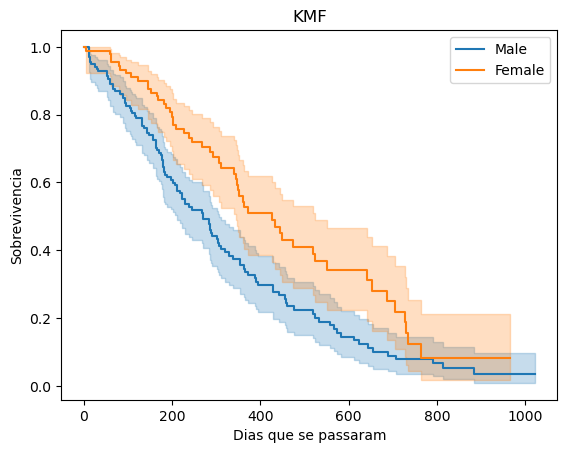

In [23]:
# Visualizacao grafica do resultado da funcao de sobrevivencia
kmf_m.plot()
kmf_f.plot()
plt.xlabel("Dias que se passaram")
plt.ylabel("Sobrevivencia")
plt.title("KMF")


              Male
timeline          
0.0       0.000000
11.0      0.021739
12.0      0.028986
13.0      0.043478
15.0      0.050725
...            ...
814.0     0.946429
840.0     0.946429
883.0     0.964286
1010.0    0.964286
1022.0    0.964286

[120 rows x 1 columns]
            Female
timeline          
0.0       0.000000
5.0       0.011111
60.0      0.022222
61.0      0.033333
62.0      0.044444
...            ...
735.0     0.875178
740.0     0.875178
765.0     0.916786
821.0     0.916786
965.0     0.916786

[88 rows x 1 columns]


<Axes: xlabel='timeline'>

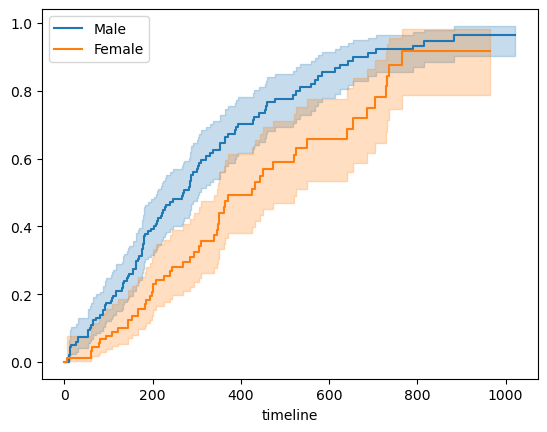

In [24]:
# Densidade acumulativa:
### probabilidade de uma pessoa morrer durante o period indicado

print (kmf_m.cumulative_density_)
print (kmf_f.cumulative_density_)

kmf_m.plot_cumulative_density()
kmf_f.plot_cumulative_density()


In [25]:
# Log-Rank Test
### Objetivo: verificar se existe alguma diferenca significante entre os grupos comparados
#### Hipotese nula: nao existe diferenca entre os grupos
#### obs. lembrando, quanto menor o p, maior a diferenca entre os grupos.
####      Se (p<0.05), entao rejeitamos a hipotese nula


# Define variables :
T=Male['time']
E=Male['dead']
T1=Female['time']
E1=Female['dead']

from lifelines.statistics import logrank_test

results=logrank_test(T,T1,event_observed_A=E, event_observed_B=E1)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

In [ ]:
###############################################################################################

In [26]:
# Cox proportional hazard model

from lifelines import CoxPHFitter

data= data.dropna(subset=['inst', 'time', 'status', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss']) # retirar linhas vazias

data = data[[ 'time', 'age', 'sex', 'ph.ecog','ph.karno', 'pat.karno', 'meal.cal', 'wt.loss', 'dead']]

cph = CoxPHFitter()
cph.fit(data,"time",event_col="dead")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'dead'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2024-08-08 16:51:58 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  0.93   0.35       1.51
sex           0.00 -2.75   0.01       7.37
ph.ecog       0.00  3.29 <0.005       9.95
ph.karno      0.00  2.00   0.05       4.45
pat.karno     0.00 -1.49   0.14       2.87
meal.cal      0.00  0.11   0.91       0.13
wt.loss       0.00 -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

<Axes: xlabel='log(HR) (95% CI)'>

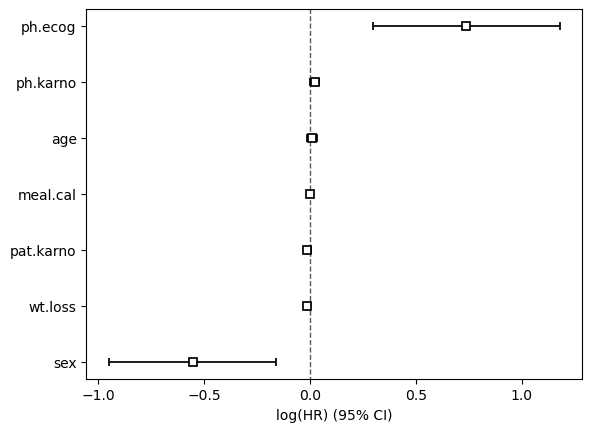

In [27]:
#Lembrando: HR = exp(coef) = 1 indica sem efeito
#           HR = exp(coef) < 1 indica reducao do "perigo"
#           HR = exp(codf) > 1 indica aumento do "perigo"

# Outra forma de visualizacao

cph.plot()


<Axes: >

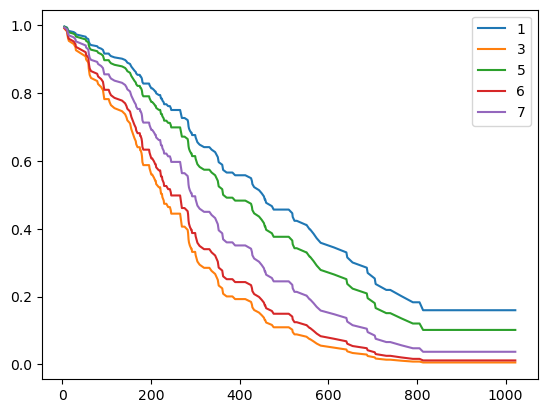

In [28]:
# Grafico da funcao de sobrevivencia
### cada linha representa um individuo

d_data = data.iloc[0:5,:]
cph.predict_survival_function(d_data).plot()

In [ ]:
############################################################
#### Outros exemplos para treinar em casa ##################
############################################################

In [ ]:
# Representacao do tempo medio de sobrevivencia

CTE = kmf.conditional_time_to_event_
plt.plot(CTE)

In [ ]:
# Exemplo para relacoes temporais (dados longitudinais)

import pandas as pd
from lifelines import CoxPHFitter

# Example dataset with lagged variable
data = {
    'id': [1, 1, 1, 2, 2, 2, 3, 3],
    'event_time': [10, 20, 30, 15, 25, 35, 10, 20],
    'time_since_last_attack': [0, 10, 10, 0, 10, 10, 0, 10],
    'potential_trigger': ['stress', 'weather', 'stress', 'weather', 'stress', 'stress', 'stress', 'weather']
}
df = pd.DataFrame(data)
df = pd.get_dummies(df, columns=['potential_trigger'])
# Fit a recurrent event analysis model with time-dependent covariates
cph = CoxPHFitter(penalizer=0.0001)

#cph.fit(df, 'event_time', event_col=None, cluster_col='id', duration_col='time_since_last_attack')
cph.fit(df, event_col=None, cluster_col='id', duration_col='event_time')

# Print the summary of the model
cph.print_summary()

In [ ]:
from lifelines import CoxTimeVaryingFitter
import pandas as pd

# Create a sample dataframe with time-varying covariates
data = {
    'id': [1, 1, 2, 2, 3],
    'start': [0, 10, 0, 5, 0],
    'stop': [10, 20, 5, 15, 5],
    'var1': [1, 0, 1, 0, 1],
    'var2': [0, 1, 1, 1, 0],
    'event': [1, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Create and fit the CoxTimeVaryingFitter model
ctv = CoxTimeVaryingFitter()

#fit(df, event_col, start_col='start', stop_col='stop', weights_col=None, id_col=None, show_progress=False, robust=False, strata=None, initial_point=None, formula: str = None, fit_options: dict | None = None)
ctv.fit(df, 'event', start_col='start', stop_col='stop', id_col='id', show_progress=False)

# Print the summary of the fitted model
ctv.print_summary()